# Introduction to neural networks using PyTorch 

In [1]:
# this is a notebook to introduce the basics of deep learning with pytorch. 

# Import the modules required:
import torch # this is the PyTorch module
import torch.nn as nn # this is the neural network module
import torch.nn.functional as F # this is the functional module
import torch.optim as optim # this is the optimizer module
import torchvision # this is the vision module

import warnings
warnings.filterwarnings("ignore") # this is to ignore warnings

# Import the MNIST dataset
from torchvision import datasets, transforms

# Import the matplotlib module
import matplotlib.pyplot as plt

# Import the numpy module
import numpy as np



 ### What is a neuron?
 
 - Define a neuron as: 
 
 $o = \tanh{(w.x+b)}$

 and explain that the input is a vector $x$ that is fixed, whereas the weights $w$ and the bias $b$ are parameters that can be adjusted to improve the performance of the neuron.

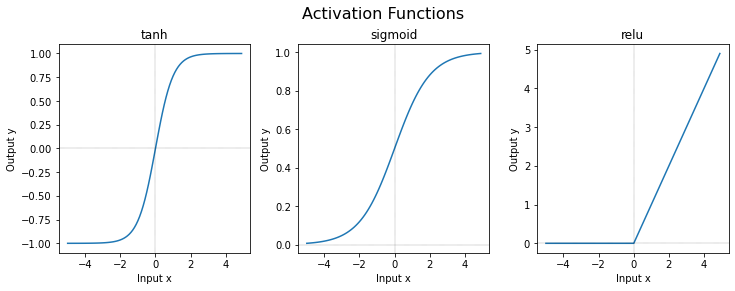

In [2]:

# There are multiple activation functions that can be used for a neuron, instead of just tanh, we can use sigmoid, ReLU, and many others.

def sigmoid(x):
    return 1/(1 + np.exp(-x))
def relu(x):
    return np.maximum(0,x)


# define the sigmoid, ReLU, and tanh activation functions:
activation_functions = [np.tanh, sigmoid, relu]

# plot the activation functions as separate plots:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# define the input values
x = np.arange(-5, 5, 0.1)

# loop over the activation functions:
for i, ax in enumerate(axes.flat):
    y = activation_functions[i](x)
    ax.plot(x, y)
    ax.set_title(f'{activation_functions[i].__name__}')
    ax.axhline(y=0, color='k', linestyle='--', lw=0.2)
    ax.axvline(x=0, color='k', linestyle='--', lw=0.2)
    ax.set(xlabel='Input x', ylabel='Output y')

# make a sup title:
fig.suptitle('Activation Functions', fontsize=16)

# make a gap between the suptitle and the plots:
fig.subplots_adjust(top=0.85)
fig.subplots_adjust(wspace=0.25)
plt.show()


In [3]:
# using numpy, define a function that serves the role of an individual neuron:
def neuron(x, w, b, activation_function=lambda x: np.tanh(x)):
    # calculate the dot product of the inputs and the weights
    z = np.dot(x, w) + b
    # apply the activation function
    a = activation_function(z)
    return a

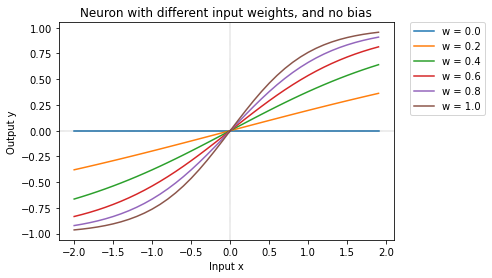

In [4]:
# To see the effect of different weights for a given input, we can plot the output of the neuron for different weights.

for i in np.arange(-0,1.1,0.2):
    x = np.arange(-2, 2, 0.1)
    y = neuron(x, w=i, b=0)
    plt.plot(x, y, label=f'w = {i.round(2)}')

    # put legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Input x')
    plt.ylabel('Output y')
plt.axhline(y=0, color='k', linestyle='--', lw=0.2)
plt.axvline(x=0, color='k', linestyle='--', lw=0.2)

plt.title('Neuron with different input weights, and no bias')

plt.show()

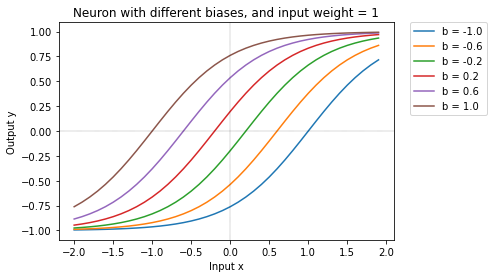

In [6]:
# To see the effect of different biases for a given input, we can plot the output of the neuron for different biases.

for i in np.arange(-1,1.1,0.4):
    x = np.arange(-2, 2, 0.1)
    y = neuron(x, 1, b=i)

    plt.plot(x, y, label=f'b = {i.round(2)}')


    # put legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Input x')
    plt.ylabel('Output y')
# draw a dotted line at x = 0 and y = 0:
plt.axhline(y=0, color='k', linestyle='--', lw=0.2)
plt.axvline(x=0, color='k', linestyle='--', lw=0.2)

plt.title('Neuron with different biases, and input weight = 1')

plt.show()

### Computing gradients using PyTorch

**Let us see how gradients in PyTorch function for simple functions:**

 - Take $y = 2x^3 + x + 1$ and $x = 2$. Compute $\frac{\partial y}{\partial x}$ by hand and confirm using the result from PyTorch.

In [7]:
# define a tensor for x, and set requires_grad to True:
x = torch.tensor(2.0, requires_grad = True)

# define the function y:
y = 2*x**3 + x + 1

# calculate the gradient of y with respect to x:
y.backward()

dy_dx = x.grad
print(f'dy/dx for x = 2: {dy_dx}')

dy/dx for x = 2: 25.0


### We can define a whole range of x values, and calculate the gradient of y with respect to x for each value of x.


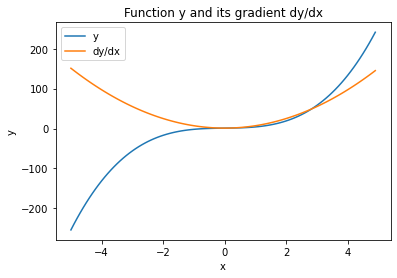

In [8]:

# plot the function y and the gradient dy/dx at a range of values for x:
x_range = np.arange(-5, 5, 0.1)
y = 2*x**3 + x + 1

# calculate the gradient of y with respect to x using PyTorch iteratively over the range of values for x:
dy_dx_torch = []
y_list = []

for i in x_range:
    x = torch.tensor(i, requires_grad = True)
    y = 2*x**3 + x + 1
    y.backward()
    dy_dx_torch.append(x.grad)
    y_list.append(y.item())

# convert the list to a numpy array:
dy_dx_torch = np.array(dy_dx_torch)

# x_range = np.arange(-2, 2, 0.1)
y = np.array(y_list)

# plot the function y and the gradient dy/dx at a range of values for x:
plt.plot(x_range, y, label='y')
plt.plot(x_range, dy_dx_torch, label='dy/dx')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function y and its gradient dy/dx')
plt.show()

In [9]:
# Can we try the same procedure for a slightly more complex fucntion, say the neuron itself?

# We can define the same neuron function as before, but this time using PyTorch:
def neuron_in_pytorch(x, w, b, activation_function=lambda x: torch.tanh(x)):
    # calculate the dot product of the inputs and the weights
    z = torch.dot(x, w) + b
    # apply the activation function
    a = activation_function(z)
    return a

# define a tensor for x, make it a vector, and set requires_grad to True:
x = torch.tensor([0.2, 0.3], requires_grad = True)

# define the weights and bias:
w = torch.tensor([1.0, 0.4])
b = torch.tensor(1.0)

# define the function y:
y = neuron_in_pytorch(x, w, b)

# calculate the gradient of y with respect to x:
y.backward()

dy_dx = x.grad

print(f'dy/dx for x = [0.2, 0.3]: {dy_dx}')

dy/dx for x = [0.2, 0.3]: tensor([0.2487, 0.0995])


### Now we can show a simple example of how gradient descent works.

The purpose is to find the minimum of a function, and we can do this by iteratively updating the input value x using the gradient descent algorithm.

### define the function y:
$y = x^2$ 

we know the minimum of this function is at x = 0: 

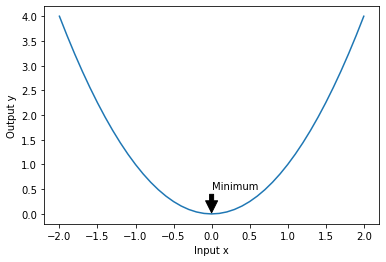

In [10]:
# plot a x^2 function:
x = np.arange(-2, 2.1, 0.1)
y = x**2
plt.plot(x, y)
plt.xlabel('Input x')
plt.ylabel('Output y')
# label the minimum point at 0,0:
plt.annotate('Minimum', xy=(0, 0), xytext=(0, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

x at iteration 0: 16.0
x at iteration 1: 12.800000190734863
x at iteration 2: 10.239999771118164
x at iteration 3: 8.191999435424805
x at iteration 4: 6.5535993576049805
x at iteration 5: 5.242879390716553
x at iteration 6: 4.194303512573242
x at iteration 7: 3.355442762374878
x at iteration 8: 2.684354305267334
x at iteration 9: 2.1474833488464355
x at iteration 10: 1.7179867029190063
x at iteration 11: 1.374389410018921
x at iteration 12: 1.0995115041732788
x at iteration 13: 0.879609227180481
x at iteration 14: 0.7036873698234558
x at iteration 15: 0.5629498958587646
x at iteration 16: 0.45035991072654724
x at iteration 17: 0.36028793454170227
x at iteration 18: 0.28823035955429077
x at iteration 19: 0.2305842936038971
x at iteration 20: 0.18446743488311768
x at iteration 21: 0.14757394790649414
x at iteration 22: 0.11805915832519531
x at iteration 23: 0.09444732964038849
x at iteration 24: 0.07555786520242691


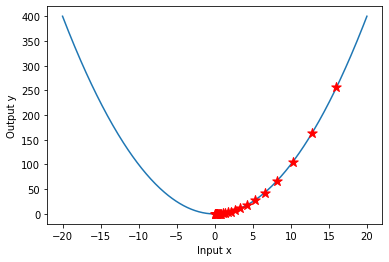

In [11]:

# write a function that starts with a random value for x, and then iteratively updates x using the gradient descent algorithm:
def gradient_descent(x, learning_rate=0.1, n_iterations=100):

    learning_rate = torch.tensor(0.1)
    x_list = []
    for i in range(n_iterations):
        # define the function y:
        y = x**2
        # calculate the gradient of y with respect to x:
        y.backward()
                
        with torch.no_grad():
            # update x:
            x -= learning_rate * x.grad
            # print the updated value of x:
            print(f'x at iteration {i}: {x}')
            # append the updated value of x to the list:
            x_list.append(x.item())
            # set the gradient to zero, otherwise it will accumulate:
            x.grad.zero_()  
    return x, x_list

# define a tensor for x, make it a scalar, and set requires_grad to True:
x = torch.tensor(20.0, requires_grad = True)

# call the gradient_descent function:
x, x_list = gradient_descent(x, learning_rate=0.1, n_iterations=25)

# plot the function y = x^2:
x = np.arange(-20, 20.1, 0.1)
y = x**2
plt.plot(x, y)

# plot the values of x that were updated during gradient descent, make each point a star and overlay it on the function y = x^2:
plt.scatter(x_list, [i**2 for i in x_list], color='red', marker='*', s=100, zorder=10)
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.show()


- When we use gradient descent in deep learning, we are trying to find the minimum of a loss function, which is a function of the weights and biases of the neural network.
- The loss function is defined as the difference between the output of the neural network and the target value, so we are trying to find the weights and biases that minimize the difference between the output of the neural network and the target value.
- The reason we need backpropagation is because we need to calculate the gradient of the loss function with respect to the weights and biases of the neural network, so that we can update the weights and biases using gradient descent.

## Example of a simple single-layer neural network:

- A layer of neurons is different to a single neuron, but the same principles apply. We can define a layer of neurons as:

$y = \tanh{(W.x + b)}$

where $W$ is a matrix of weights, $b$ is a vector of biases, and $x$ is a vector of inputs.

- We will also need to understand that the (learnable) weights and biases are updated through gradient descent. This is done by taking the derivative of the loss function with respect to the weights and biases, and then updating the weights and biases by subtracting the derivative from the current value. This is done for each weight and bias in the network. The process by which this is done is called backpropagation.

A very simple task for us to perform is to create a layer of neurons that can learn the truth table for an AND gate. An AND gate is a logic gate that outputs 1 if both inputs are 1, and 0 otherwise.

The truth table for an AND gate is:

| first input (x1) | second input (x2) | output (y) |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 0 |
| 1  | 0  | 0 |
| 1  | 1  | 1 |

The x1 and x2 columns will be the inputs to the layer of neurons, and the y column will be the output. We can represent this as a matrix:

$X = \begin{bmatrix} 0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$
$y = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$



In [12]:
x_train =    np.array([[0, 0],
    [0, 1],
    [1, 0],
    [1, 1]], dtype=np.float32)

y_train = np.array([[0], [0], [0], [1]], dtype=np.float32)

# convert the numpy arrays to PyTorch tensors:
x_train = torch.from_numpy(x_train) 
y_train = torch.from_numpy(y_train)

# the number of epochs is the number of times the training data is passed through the single-layer neural network:
epochs = 5000

# the learning rate is the step size for the gradient descent:
learning_rate = 0.1

# number of features - 2 in this case
input_size = len(x_train[0]) 

# number of outputs - 1 in this case (on/off)
output_size = 1

losses = []
w = torch.randn(input_size, output_size, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

for e in range(epochs):

    # calculate the output of the neuron:
    y_pred = torch.matmul(x_train, w) + b

    # apply a sigmoid activation function to the output of the neuron:
    y_pred = torch.sigmoid(y_pred)

    # calculate the loss:
    loss = (y_pred - y_train).pow(2).sum() # MSE loss

    # print the loss every 500 epochs
    if e % 500 ==0:
        print(f'Epoch: {e} | loss: {loss.item():.4f}')
    losses.append(loss.item())

    # calculate the gradients of the loss with respect to the weights and biases:
    loss.backward()

    # update the weights and biases:
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # zero the gradients. Otherwise, they will accumulate:
        w.grad.zero_()
        b.grad.zero_()



Epoch: 0 | loss: 1.7947
Epoch: 500 | loss: 0.1279
Epoch: 1000 | loss: 0.0628
Epoch: 1500 | loss: 0.0403
Epoch: 2000 | loss: 0.0292
Epoch: 2500 | loss: 0.0228
Epoch: 3000 | loss: 0.0186
Epoch: 3500 | loss: 0.0157
Epoch: 4000 | loss: 0.0135
Epoch: 4500 | loss: 0.0119


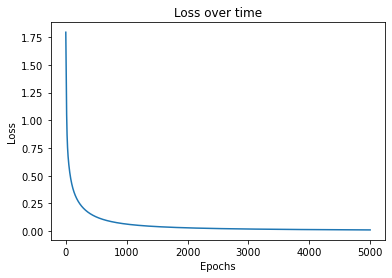

In [13]:
# plot the loss over time:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over time')

plt.show()
# Ṭhis shows that the loss is decreasing over time, which means that the neural network is learning.

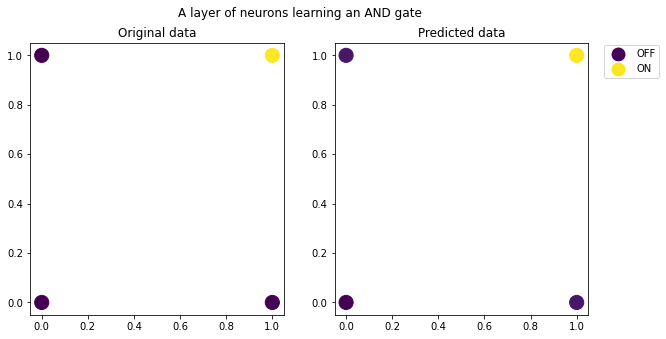

In [14]:
# Compare the real labels of the AND gate to the predicted labels from the perceptron:

# make two subplots, side by side:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot the original data:
ax1.scatter(x_train[:, 0], x_train[:,1], c=y_train.numpy(), s=200)

# plot the predicted data:
ax2.scatter(x_train[:, 0], x_train[:,1], c=y_pred.detach().numpy(), s=200)

# add a title to each subplot:
ax1.set_title('Original data')
ax2.set_title('Predicted data')

# add a title to the figure:
fig.suptitle('A layer of neurons learning an AND gate')

# make a manual legend:
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.colors as colors

norm = colors.Normalize(vmin=0, vmax=1)
rgba_color_0 = cm.viridis(norm(0.01)) 
rgba_color_1 = cm.viridis(norm(.99)) 
line1 = Line2D([], [], color="white", marker='o', markerfacecolor=rgba_color_0, markersize=15)
line2 = Line2D([], [], color="white", marker='o', markerfacecolor=rgba_color_1, markersize=15)

plt.legend((line1, line2), ('OFF', 'ON'), numpoints=1, loc=1, bbox_to_anchor=(1.3, 1.01))
plt.show()

## Multi-layer neural networks

- Now that a single layer of neurons has been implemented, we can use PyTorch to implement multiple layers to classify the MNIST (hand written digits) dataset.
- We don't have to write everything as explicitly as we did in the previous exercise. We can use the `nn` module in PyTorch to define the layers of the network. The `nn` module has a `Sequential` class that allows us to define a network as a sequence of layers. We can also use the `nn` module to define the loss function and the optimizer. 

In [15]:
# Use the nn module to create an MLP to classify MNIST, with 3 layers:

# import the nn module from PyTorch
import torch.nn as nn

# define the MLP class:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # The forward pass is the sequence of operations 
        # that the input x goes through in the network. 
        # In this case, the input goes through 3 linear layers,
        # where a ReLU activation function is applied to the 
        # output of the first two layers, before the output is
        # passed through a softmax activation function:
        out = nn.Sequential(
            # flatten the image:
            nn.Flatten(),
            # apply the first linear layer:
            self.linear1,
            # apply the ReLU activation function:
            nn.ReLU(),
            # apply the second linear layer:
            self.linear2,
            # apply the ReLU activation function:
            nn.ReLU(),
            # apply the third linear layer:
            self.linear3,
            # apply the softmax activation function, 
            # this is necessary because the output 
            # of the network is a probability distribution 
            # and we want the the most probable class to be 
            # 1 and the rest to be 0:
            nn.Softmax(dim=1)
        )(x)
        return out


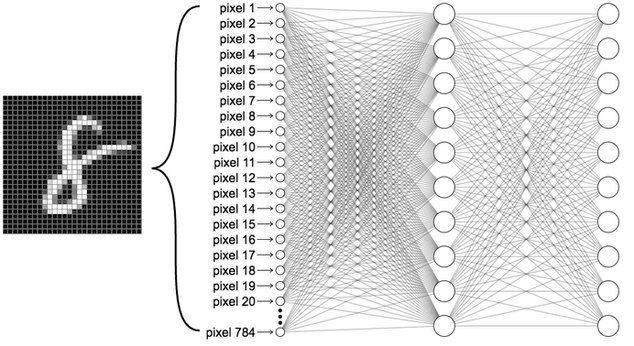

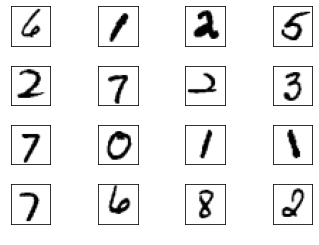

In [16]:

# We are now ready to download the MNIST dataset. 
# PyTorch has a built-in function to download the dataset, 
# and to load it into a data loader. This is a convenient
# way to load the data into batches and apply transformations 
# to the data. We will use the data loader to load the data
# into batches of 64 images, and to normalize the images:

# define a training data loader
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                     transform=transforms.Compose([
                          transforms.ToTensor(),    # convert the image to a tensor
                          transforms.Normalize((0.1307,), (0.3081,)) # normalize the image
                        ])),
    batch_size=64, shuffle=True)

# define a test data loader
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307,), (0.3081,))
                        ])),
    batch_size=1000, shuffle=True)

# define a function to plot the images
def plot_images(images, labels):
    fig, axes = plt.subplots(4, 4)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='binary')
        ax.set(xticks=[], yticks=[], xlabel=int(labels[i]))
        # make a white background for the text
        ax.xaxis.label.set_color('white')
        # increase the vertical distance between the subplots:
        fig.subplots_adjust(hspace=0.5)
    plt.show()


# plot a few of the MNIST images with their labels:
images, labels = next(iter(train_loader))
plot_images(images, labels)


In [17]:
# Define a function to train the model:

# define a function to train the model
def train(model, device, train_loader, optimizer, epoch):
    model.train() # set the model to training mode
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device) # send the data to the device
        optimizer.zero_grad() # zero the gradients
        output = model(data) # forward pass
        loss = F.nll_loss(output, target) # calculate the loss
        loss.backward() # backward pass
        optimizer.step() # update the weights

        # print the training loss
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# define a function to test the model
def test(model, device, test_loader):
    model.eval() # set the model to evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad(): # don't calculate the gradients
        for data, target in test_loader:
            data, target = data.to(device), target.to(device) # send the data to the device
            output = model(data) # forward pass
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up the batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability

            # check if the prediction is correct
            correct += pred.eq(target.view_as(pred)).sum().item()

    # calculate the average loss and accuracy
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))

# run the training:

# define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create an instance of the MLP class
model = MLP(input_size=784, hidden_size=512, output_size=10).to(device)

# define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# train the model for 5 epochs
for epoch in range(5):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)


Train Epoch: 0 [0/60000 (0%)]	Loss: -0.099399
Train Epoch: 0 [6400/60000 (11%)]	Loss: -0.107107
Train Epoch: 0 [12800/60000 (21%)]	Loss: -0.123143
Train Epoch: 0 [19200/60000 (32%)]	Loss: -0.181066
Train Epoch: 0 [25600/60000 (43%)]	Loss: -0.234915
Train Epoch: 0 [32000/60000 (53%)]	Loss: -0.339857
Train Epoch: 0 [38400/60000 (64%)]	Loss: -0.501305
Train Epoch: 0 [44800/60000 (75%)]	Loss: -0.603146
Train Epoch: 0 [51200/60000 (85%)]	Loss: -0.644987
Train Epoch: 0 [57600/60000 (96%)]	Loss: -0.744743
Test set: Average loss: -0.7261, Accuracy: 7993/10000 (80%)
Train Epoch: 1 [0/60000 (0%)]	Loss: -0.702873
Train Epoch: 1 [6400/60000 (11%)]	Loss: -0.703878
Train Epoch: 1 [12800/60000 (21%)]	Loss: -0.794617
Train Epoch: 1 [19200/60000 (32%)]	Loss: -0.703202
Train Epoch: 1 [25600/60000 (43%)]	Loss: -0.814170
Train Epoch: 1 [32000/60000 (53%)]	Loss: -0.755944
Train Epoch: 1 [38400/60000 (64%)]	Loss: -0.857567
Train Epoch: 1 [44800/60000 (75%)]	Loss: -0.869904
Train Epoch: 1 [51200/60000 (85%)]

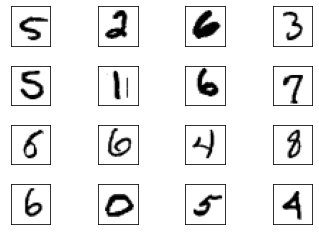

Predicted labels: [5, 2, 6, 3, 5, 8, 6, 7, 5, 6, 4, 8, 6, 0, 5, 4]
Actual labels:    [5, 2, 6, 3, 5, 1, 6, 7, 6, 6, 4, 8, 6, 0, 5, 4]


In [18]:
# We can now use the model to make predictions on the test set:

# get the first batch of test images
images, labels = next(iter(test_loader))

# plot the images
plot_images(images, labels)

# get the model predictions
preds = model(images.to(device))

# get the index of the max log-probability
preds = preds.argmax(dim=1, keepdim=True)

# print the predictions

predicted_labels_list = preds.squeeze().tolist() 
print('Predicted labels:', predicted_labels_list[:16])

# print the actual labels
print('Actual labels:   ', labels[:16].tolist())



Explain why MLPs are bad for images, namely it has to flatten the image into a vector, and treat each pixel as a feature instead of learning the relationships between the pixels. In order to learn patterns from images, we need a different approach that is invariant to: 
 - translation
- rotation
- scaling
- illumination

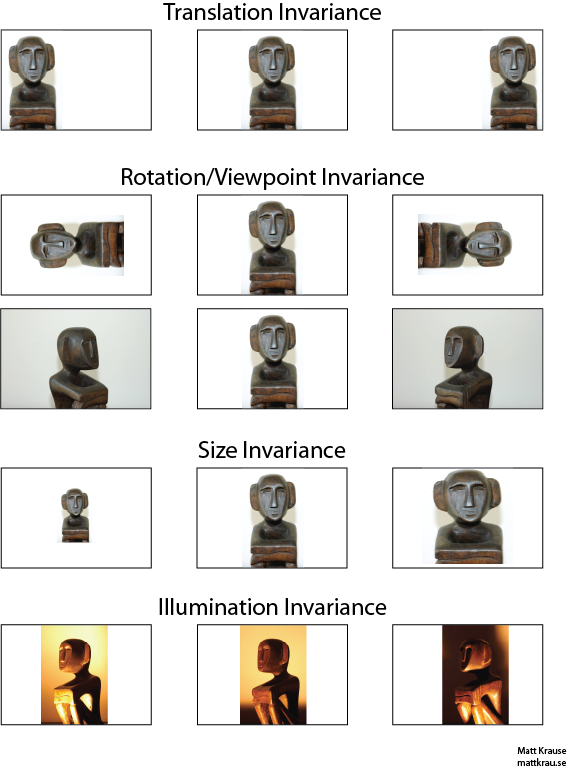

### Convolutional Neural Networks (CNNs)

Convolutions - unlike a fully connected neural network - are invariant to translation, rotation, scaling and illumination. These operate through kernels that are applied to the image. The kernel is a small matrix that is applied to the image. The kernel is moved across the image, and the dot product of the kernel and the image is computed. The output of the convolution is a feature map. The kernel is learnt during training. The next lesson will introduce CNNs and their application in classifying MNIST digits once again before moving on to more complex datasets.